# Custom indicator example

In [1]:
import yfinance as yf

from mplchart.chart import Chart

from mplchart.library import get_series, calc_ema
from mplchart.primitives import Candlesticks, OHLC, Volume

from dataclasses import dataclass

In [2]:
ticker = "AAPL"
prices = yf.download(ticker, period="5y", auto_adjust=True)
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-17 00:00:00-05:00,39.700180,40.396045,39.047508,39.337852,177151600,0.0,0.0
2018-12-18 00:00:00-05:00,39.683374,40.199271,39.445819,39.848942,135366000,0.0,0.0
2018-12-19 00:00:00-05:00,39.832154,40.180085,38.174080,38.605995,196189200,0.0,0.0
2018-12-20 00:00:00-05:00,38.488423,38.898744,37.264667,37.631794,259092000,0.0,0.0
2018-12-21 00:00:00-05:00,37.638979,37.950918,35.904122,36.168068,382978400,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-11 00:00:00-05:00,193.110001,193.490005,191.419998,193.179993,60943700,0.0,0.0
2023-12-12 00:00:00-05:00,193.080002,194.720001,191.720001,194.710007,52696900,0.0,0.0
2023-12-13 00:00:00-05:00,195.089996,198.000000,194.850006,197.960007,70404200,0.0,0.0


In [3]:
@dataclass
class DEMA:
    """Double Exponential Moving Average"""

    period: int = 20

    same_scale = True
    # same_scale is an optional class attribute
    # to specify that the indicator can be drawn
    # on the same axes as the previous indicator

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2

In [4]:
res = DEMA(20)(prices)
res.tail()

Date
2023-12-11 00:00:00-05:00    194.489611
2023-12-12 00:00:00-05:00    194.939292
2023-12-13 00:00:00-05:00    195.894888
2023-12-14 00:00:00-05:00    196.723074
2023-12-15 00:00:00-05:00    197.315644
Name: close, dtype: float64

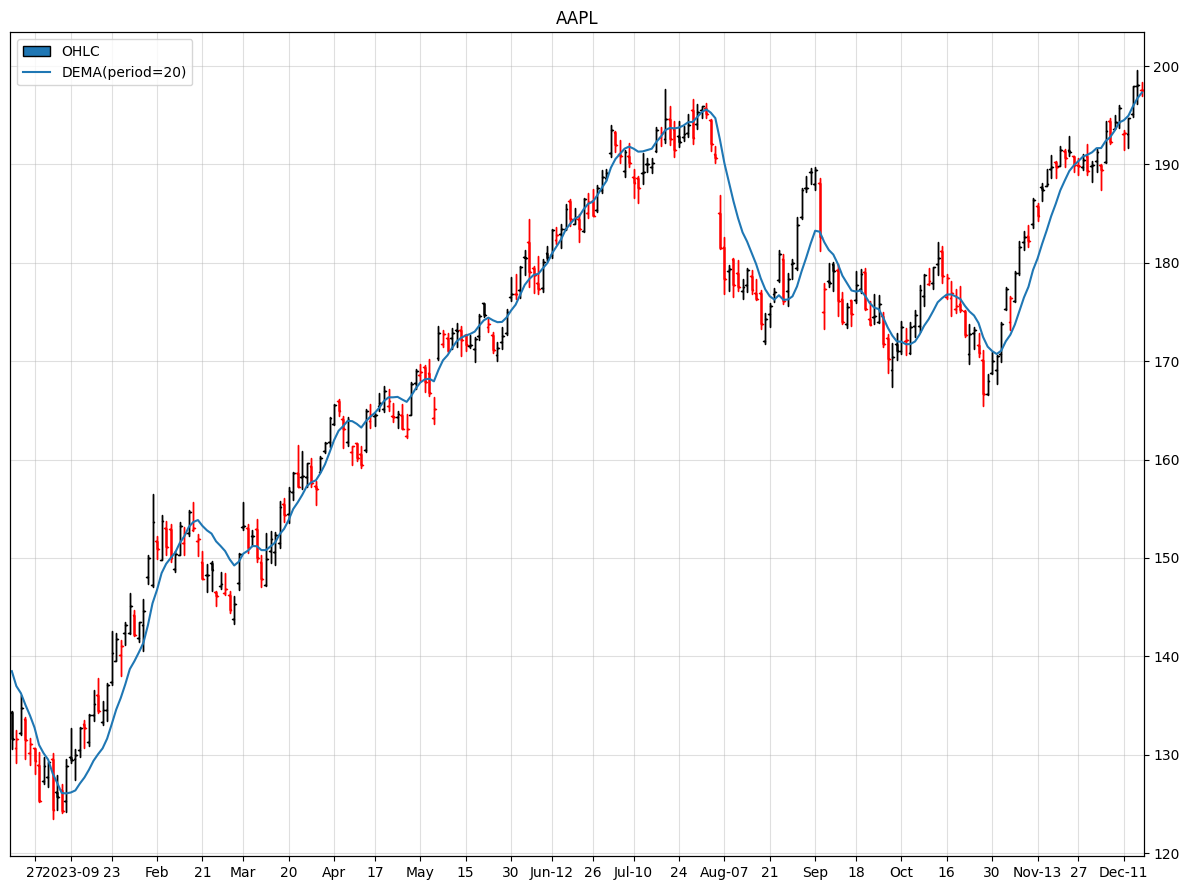

In [5]:
max_bars = 250

indicators = [
    OHLC(),
    DEMA(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)